<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#DeepMAsED-SM-run" data-toc-modified-id="DeepMAsED-SM-run-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DeepMAsED-SM run</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Stats" data-toc-modified-id="Stats-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Stats</a></span></li><li><span><a href="#metaMIC" data-toc-modified-id="metaMIC-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>metaMIC</a></span><ul class="toc-item"><li><span><a href="#True-misassemblies" data-toc-modified-id="True-misassemblies-4.3.2.1"><span class="toc-item-num">4.3.2.1&nbsp;&nbsp;</span>True misassemblies</a></span></li><li><span><a href="#metaMIC-contig-scores" data-toc-modified-id="metaMIC-contig-scores-4.3.2.2"><span class="toc-item-num">4.3.2.2&nbsp;&nbsp;</span>metaMIC contig scores</a></span></li><li><span><a href="#AUCPR" data-toc-modified-id="AUCPR-4.3.2.3"><span class="toc-item-num">4.3.2.3&nbsp;&nbsp;</span>AUCPR</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Simulation run with GTDBr89-random 9k training ref genomes
* Resulting feature table used for training ResMiCo

# Var

In [16]:
work_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train'

ref_genomes_file = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/ref_genomes/GTDBr89/metadata_n9000-rand_train.tsv'

# Init

In [17]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [163]:
library(PRROC)

In [18]:
df.dims()
setDTthreads(4)

# DeepMAsED-SM run

## Config

In [15]:
cat_file(file.path(work_dir, 'config.yaml'))

# Input table
genomes_file: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/ref_genomes/GTDBr89/metadata_n9000-rand_train.tsv

# Output directory
output_dir: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/

# Temporary output directory (/dev/shm/ for shared memory)
#tmp_dir: /tmp/
tmp_dir: /ebio/abt3_scratch/

# Email for notifications ("Skip" to skip)
email: nyoungblut@tuebingen.mpg.de

# software parameters for data simulations
## Use "Skip" to skip  steps. If no params for rule, use ""
## `reps:` is the number of replicate simulations
## If `keep_reads: True`, then simulated reads are kept
params:
  ionice: -c 3
  # simulating metagenomes
  MGSIM:
    genome_download: ""
    sim_reps: 3
    community:
      richness:
        - 0.005555
        - 0.111111
        - 0.333333
        - 0.555555
      abundance_distribution:
        - "mean:10,sigma:1"
        - "mean:10,sigma:2"
      other_sim_params: --rnd-seed 8712
    reads: 
    

## Run

```
(snakemake) @ rick:/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/bin/ResMiCo/ResMiCo-SM
$ screen -L -S rmc-sm-n9k ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/config.yaml 30 --notemp -F
```

## Summary

In [21]:
P = file.path(work_dir, 'features')
feat_files = list_files(P, 'features.tsv.gz')
feat_files %>% length
feat_files %>% head(n=3)

[1] 288

[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.005555/mean-10-sigma-1/1/100/2000000/megahit/features.tsv.gz"   
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.005555/mean-10-sigma-1/1/100/2000000/metaspades/features.tsv.gz"
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.005555/mean-10-sigma-1/1/100/500000/megahit/features.tsv.gz"

In [65]:
# which are empty?
file_list = list()
for(F in feat_files){
    if(file.size(F) >= 1e3){
        file_list[[F]] = F
    } else {
        cat('File size too small:', F, '\n')
    }
}
file_list %>% length

File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.555555/mean-10-sigma-1/1/100/500000/metaspades/features.tsv.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.555555/mean-10-sigma-1/2/100/500000/metaspades/features.tsv.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.555555/mean-10-sigma-1/3/100/500000/metaspades/features.tsv.gz 


[1] 285

### Stats

In [89]:
read_feat = function(F){
    df = Fread(F) %>%
        select.(assembler, contig, 
                coverage, num_SNPs, min_insert_size_Match, mean_insert_size_Match, mean_mapq_Match, 
                num_proper_Match, num_orphans_Match, num_discordant_Match, num_proper_SNP, 
                seq_window_entropy, seq_window_perc_gc, Extensive_misassembly) %>%
        summarize.(coverage = mean(coverage, na.rm=TRUE),
                   num_SNPs = mean(num_SNPs, na.rm=TRUE),
                   min_insert_size_Match = mean(min_insert_size_Match, na.rm=TRUE),
                   mean_insert_size_Match = mean(mean_insert_size_Match, na.rm=TRUE),
                   mean_mapq_Match = mean(mean_mapq_Match, na.rm=TRUE),
                   num_proper_Match = mean(num_proper_Match, na.rm=TRUE),
                   num_orphans_Match = mean(num_orphans_Match, na.rm=TRUE),
                   num_discordant_Match = mean(num_discordant_Match, na.rm=TRUE),
                   num_proper_SNP = mean(num_proper_SNP, na.rm=TRUE),
                   seq_window_entropy = mean(seq_window_entropy, na.rm=TRUE),
                   seq_window_perc_gc = mean(seq_window_perc_gc, na.rm=TRUE),
                   Extensive_misassembly = mean(Extensive_misassembly, na.rm=TRUE),
                   .by=c(assembler, contig))
    x = unlist(strsplit(F, '/'))
    df$richness = x[length(x)-6]
    df$abund_dist = x[length(x)-5]
    df$sim_rep = x[length(x)-4]
    df$read_length = x[length(x)-3]
    df$seq_depth = x[length(x)-2]
    return(df)
}
doParallel::registerDoParallel(16)
df = file_list %>%
#    head(n=2) %>%
    plyr::llply(read_feat, .parallel=TRUE) %>%
    rbindlist(use.names=TRUE) 
df

assembler,contig,coverage,num_SNPs,min_insert_size_Match,mean_insert_size_Match,mean_mapq_Match,num_proper_Match,num_orphans_Match,num_discordant_Match,num_proper_SNP,seq_window_entropy,seq_window_perc_gc,Extensive_misassembly,richness,abund_dist,sim_rep,read_length,seq_depth
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
megahit,k119_13284,2.977885,0.003846154,229.7442,268.5023,42,2.878846,0.09519231,0.0000000,0.003846154,1.598175,0.6415596,0,0.005555,mean-10-sigma-1,1,100,2000000
megahit,k119_22,5.015003,0.008277289,192.3533,262.5513,42,4.748060,0.05173306,0.2069322,0.008277289,1.486838,0.4251428,0,0.005555,mean-10-sigma-1,1,100,2000000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
metaspades,NODE_6857_length_2630_cov_2.959612,5.049049,0.014448669,195.9144,248.2176,41.4613,4.996198,0.00000000,0.05703422,0.019391635,1.464027,0.3719901,0,0.555555,mean-10-sigma-2,3,150,8000000
metaspades,NODE_6858_length_2630_cov_2.241553,3.798099,0.003422053,228.4475,263.8258,42.0000,3.754373,0.05703422,0.00000000,0.006844106,1.542252,0.5636080,0,0.555555,mean-10-sigma-2,3,150,8000000


In [90]:
# per-contig coverage distribution
summary_x(df$coverage)
quantile(df$coverage, 0.95)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
coverage,1.002935,3.185874,3.95477,4.4629,5.006528,19.99885,6.87,2.805


95% 
8.049993

In [91]:
# SNPs
summary_x(df$num_SNPs)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
num_SNPs,0,0.003745318,0.00635497,0.02091153,0.01273262,1.611185,0.654,0.267


In [92]:
# insert sizes
summary_x(df$min_insert_size_Match)
summary_x(df$mean_insert_size_Match)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
min_insert_size_Match,0.7476281,182.2774,205.1969,201.474,224.6834,388.1131,123.32,50.345


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
mean_insert_size_Match,82.2015,243.2119,257.2048,254.616,268.1239,557.6119,154.145,62.929


In [93]:
# mapq
summary_x(df$mean_mapq_Match)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
mean_mapq_Match,0.3119137,41.33787,42,40.98406,42,42,16.887,6.894


In [94]:
# proper
summary_x(df$num_proper_Match)
summary_x(df$num_proper_SNP)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
num_proper_Match,0.7713043,3.029536,3.777778,4.256361,4.817412,19.96985,6.937,2.832


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
num_proper_SNP,0,0.005847953,0.008826125,0.01982853,0.01416208,1.081055,0.437,0.179


In [95]:
# orphans
summary_x(df$num_orphans_Match)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
num_orphans_Match,0,0,0.09832842,0.1578452,0.2109705,14.63271,5.936,2.423


In [96]:
# discordant
summary_x(df$num_discordant_Match)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
num_discordant_Match,0,0,0,0.04326046,0.03025719,10.34765,4.218,1.722


In [97]:
# entropy
summary_x(df$seq_window_entropy)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
seq_window_entropy,1.10283,1.482194,1.519409,1.510237,1.546145,1.794799,0.222,0.091


In [98]:
# GC
summary_x(df$seq_window_perc_gc)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
seq_window_perc_gc,0.1070284,0.3894921,0.4795339,0.4933475,0.6077598,0.8032929,0.232,0.095


In [99]:
# misassemblies
table(df$Extensive_misassembly)


      0       1 
3031322  156120 

In [100]:
send_email('http://127.0.0.1:9704/notebooks/deepmased/notebooks/01_resmico-sm/02_GTDBr89_n9k-rand/01_train.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



### metaMIC

In [116]:
# filtering empty files
filter_empty = function(files){
    L = list()
    for(F in files){
        if(file.size(F) >= 1e3){
            L[[F]] = F
        } else {
            cat('File size too small:', F, '\n')
        }
    }
    cat('Files remaining:', L %>% length, '\n')
    return(L)
}

#### True misassemblies

In [147]:
P = file.path(work_dir, 'features')
feat_files = list_files(P, 'features.tsv.gz')
feat_files %>% length
feat_files %>% head(n=3)

[1] 288

[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.005555/mean-10-sigma-1/1/100/2000000/megahit/features.tsv.gz"   
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.005555/mean-10-sigma-1/1/100/2000000/metaspades/features.tsv.gz"
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.005555/mean-10-sigma-1/1/100/500000/megahit/features.tsv.gz"

In [148]:
# filtering
feat_files = filter_empty(feat_files)

File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.555555/mean-10-sigma-1/1/100/500000/metaspades/features.tsv.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.555555/mean-10-sigma-1/2/100/500000/metaspades/features.tsv.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/features/0.555555/mean-10-sigma-1/3/100/500000/metaspades/features.tsv.gz 
Files remaining: 285 


In [149]:
# loading contig misassembly info 
read_feat_mis = function(F){
    df = Fread(F) %>%
        select.(assembler, contig, Extensive_misassembly) %>%
        summarize.(Extensive_misassembly = first(Extensive_misassembly),
                   .by=c(assembler, contig))
    x = unlist(strsplit(F, '/'))
    df$richness = x[length(x)-6]
    df$abund_dist = x[length(x)-5]
    df$sim_rep = x[length(x)-4]
    df$read_length = x[length(x)-3]
    df$seq_depth = x[length(x)-2]
    return(df)
}
doParallel::registerDoParallel(6)
true_mis = feat_files %>%
    #head(n=1) %>%
    plyr::llply(read_feat_mis, .parallel=TRUE) %>%
    rbindlist(use.names=TRUE) 
true_mis

assembler,contig,Extensive_misassembly,richness,abund_dist,sim_rep,read_length,seq_depth
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
megahit,k119_13284,0,0.005555,mean-10-sigma-1,1,100,2000000
megahit,k119_22,0,0.005555,mean-10-sigma-1,1,100,2000000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
metaspades,NODE_6857_length_2630_cov_2.959612,0,0.555555,mean-10-sigma-2,3,150,8000000
metaspades,NODE_6858_length_2630_cov_2.241553,0,0.555555,mean-10-sigma-2,3,150,8000000


In [158]:
# checking the number of parameter combinations
true_mis %>%
    distinct.(assembler, richness, abund_dist, sim_rep, read_length, seq_depth)

assembler,richness,abund_dist,sim_rep,read_length,seq_depth
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
megahit,0.005555,mean-10-sigma-1,1,100,2000000
metaspades,0.005555,mean-10-sigma-1,1,100,2000000
⋮,⋮,⋮,⋮,⋮,⋮
megahit,0.555555,mean-10-sigma-2,3,150,8000000
metaspades,0.555555,mean-10-sigma-2,3,150,8000000


#### metaMIC contig scores

In [246]:
P = file.path(work_dir, 'metaMIC')
files = list_files(P, 'metaMIC_contig_score.txt.gz')
files %>% length
files %>% head(n=3)

[1] 288

[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.005555/mean-10-sigma-1/1/100/2000000/megahit/metaMIC/metaMIC_contig_score.txt.gz"   
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.005555/mean-10-sigma-1/1/100/2000000/metaspades/metaMIC/metaMIC_contig_score.txt.gz"
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.005555/mean-10-sigma-1/1/100/500000/megahit/metaMIC/metaMIC_contig_score.txt.gz"

In [247]:
# filtering
files = filter_empty(files)

File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.111111/mean-10-sigma-1/1/100/500000/megahit/metaMIC/metaMIC_contig_score.txt.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.111111/mean-10-sigma-1/1/100/500000/metaspades/metaMIC/metaMIC_contig_score.txt.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.111111/mean-10-sigma-1/1/150/500000/megahit/metaMIC/metaMIC_contig_score.txt.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.111111/mean-10-sigma-1/1/150/500000/metaspades/metaMIC/metaMIC_contig_score.txt.gz 
File size too small: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/resmico-sm/GTDBr89_n9k_train/metaMIC/0.111111/mean-10-sigma-1/2/100/500000/megahit/metaMIC/metaMIC_contig_score.tx

In [248]:
read_table = function(F){
    df = Fread(F) 
    x = unlist(strsplit(F, '/'))
    df$richness = x[length(x)-7]
    df$abund_dist = x[length(x)-6]
    df$sim_rep = x[length(x)-5]
    df$read_length = x[length(x)-4]
    df$seq_depth = x[length(x)-3]
    df$assembler = x[length(x)-2]
    return(df)
}
mMIC = files %>%
    plyr::llply(read_table, .parallel=FALSE) %>%
    rbindlist(use.names=TRUE) 
mMIC

contig,metaMIC_contig_score,length,richness,abund_dist,sim_rep,read_length,seq_depth,assembler
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
k119_10013,0.6397,4621,0.005555,mean-10-sigma-1,1,100,2000000,megahit
k119_10044,0.1829,2785,0.005555,mean-10-sigma-1,1,100,2000000,megahit
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NODE_99_length_39258_cov_4.912532,0.24615,39258,0.555555,mean-10-sigma-2,3,150,8000000,metaspades
NODE_9_length_208104_cov_6.606266,0.35655,208104,0.555555,mean-10-sigma-2,3,150,8000000,metaspades


In [249]:
overlap(mMIC$contig, true_mis$contig)
mMIC = mMIC %>%
    right_join.(true_mis, c('contig', 'assembler', 'richness',
                            'abund_dist','sim_rep','read_length',
                            'seq_depth')) %>%
    mutate.(metaMIC_contig_score = ifelse(is.na(metaMIC_contig_score), 0, 
                                          metaMIC_contig_score)) %>%
    filter.(sim_rep == 1)
mMIC

intersect(x,y): 354460 
setdiff(x,y): 0 
setdiff(y,x): 700237 
union(x,y): 1054697 


contig,metaMIC_contig_score,length,richness,abund_dist,sim_rep,read_length,seq_depth,assembler,Extensive_misassembly
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
k119_13284,0.0000,NA,0.005555,mean-10-sigma-1,1,100,2000000,megahit,0
k119_22,0.2418,1933,0.005555,mean-10-sigma-1,1,100,2000000,megahit,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NODE_6857_length_2630_cov_2.959612,0,NA,0.555555,mean-10-sigma-2,1,150,8000000,metaspades,0
NODE_6858_length_2630_cov_2.241553,0,NA,0.555555,mean-10-sigma-2,1,150,8000000,metaspades,0


In [250]:
# checking the number of parameter combinations
mMIC %>%
    distinct.(assembler, richness, abund_dist, sim_rep, read_length, seq_depth)

assembler,richness,abund_dist,sim_rep,read_length,seq_depth
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
megahit,0.005555,mean-10-sigma-1,1,100,2000000
metaspades,0.005555,mean-10-sigma-1,1,100,2000000
⋮,⋮,⋮,⋮,⋮,⋮
megahit,0.555555,mean-10-sigma-2,1,150,8000000
metaspades,0.555555,mean-10-sigma-2,1,150,8000000


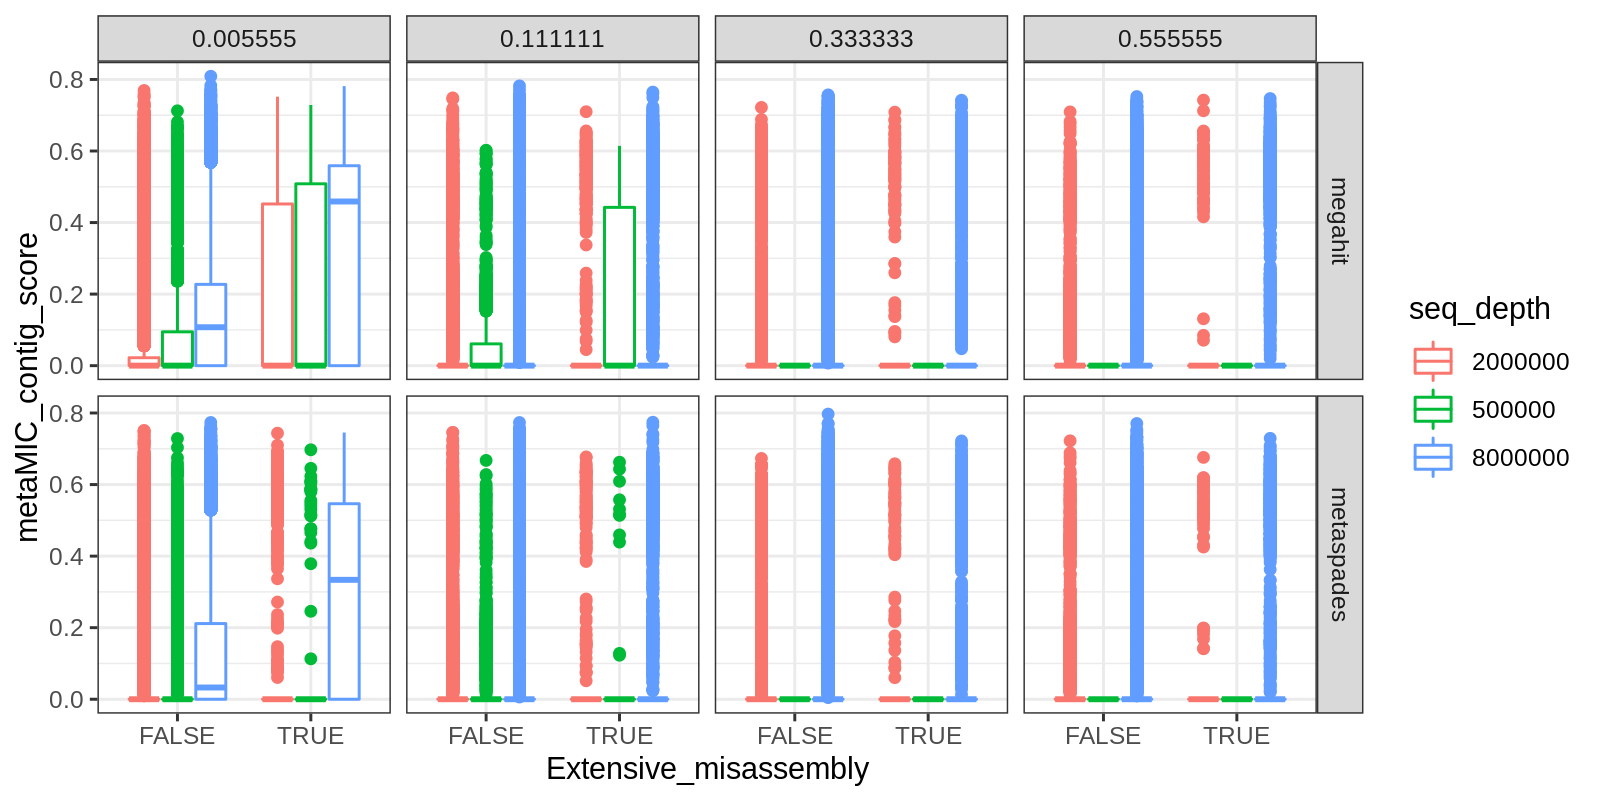

In [251]:
# plotting
p = mMIC %>%
    mutate.(Extensive_misassembly = Extensive_misassembly == 1) %>%
    ggplot(aes(Extensive_misassembly, metaMIC_contig_score, color=seq_depth)) +
    geom_boxplot() +
    facet_grid(assembler ~ richness) +
    theme_bw()
p.dims(8,4)
plot(p)

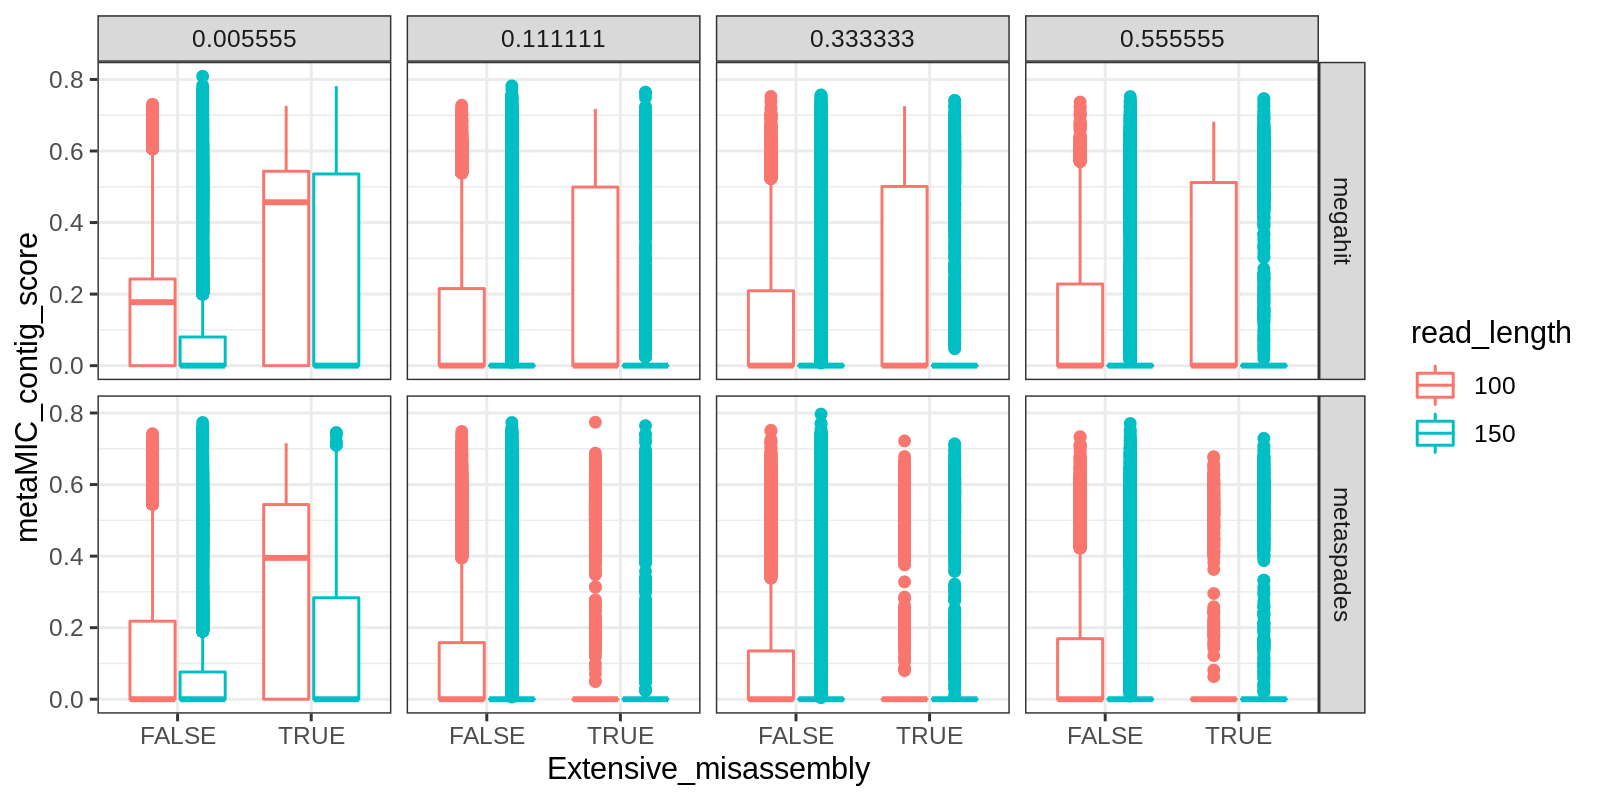

In [252]:
# plotting
p = mMIC %>%
    mutate.(Extensive_misassembly = Extensive_misassembly == 1) %>%
    ggplot(aes(Extensive_misassembly, metaMIC_contig_score, color=read_length)) +
    geom_boxplot() +
    facet_grid(assembler ~ richness) +
    theme_bw()
p.dims(8,4)
plot(p)

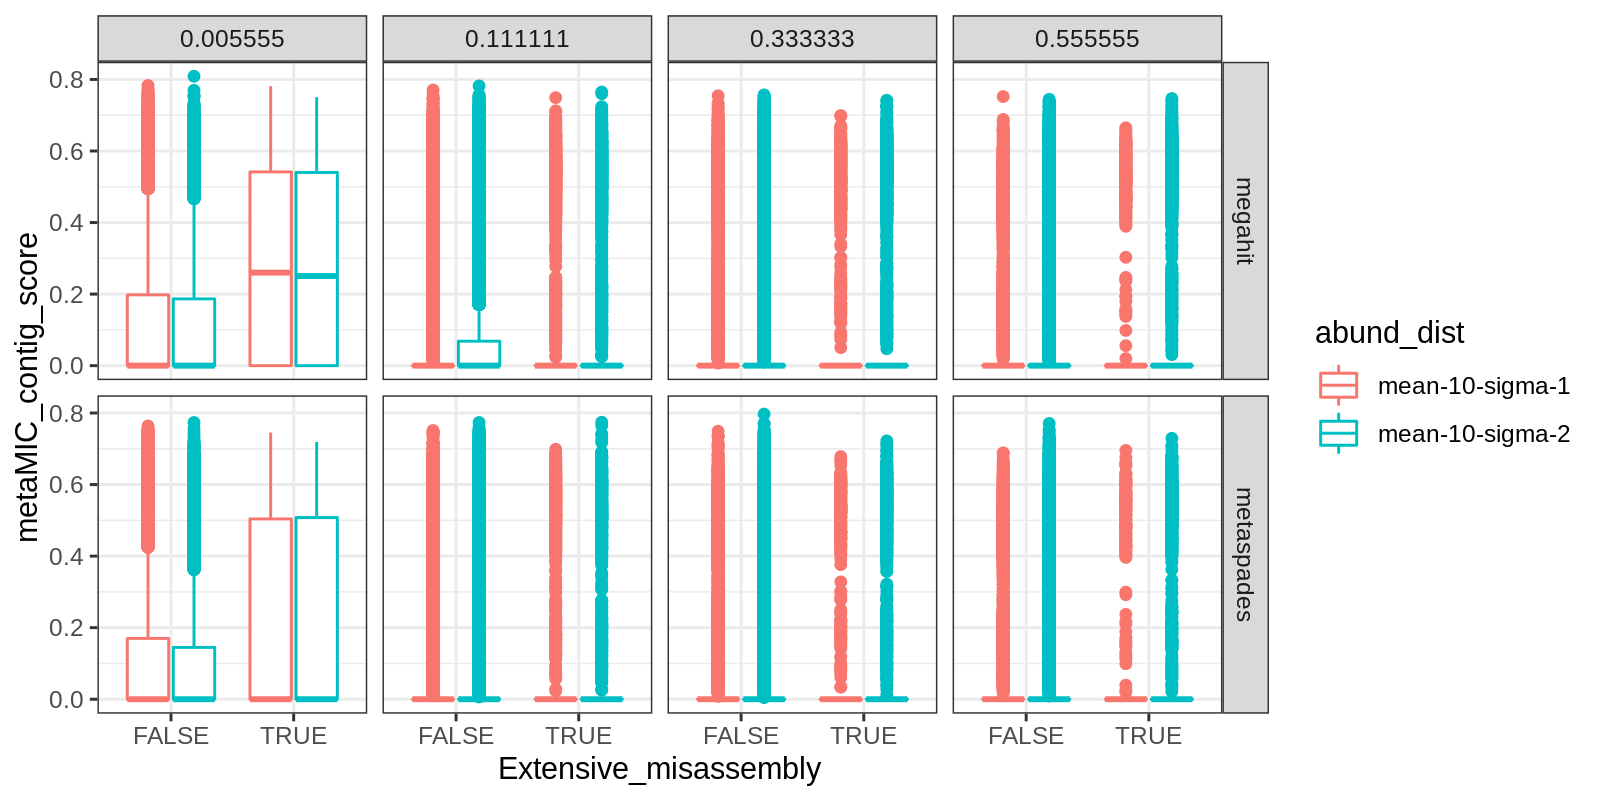

In [253]:
# plotting
p = mMIC %>%
    mutate.(Extensive_misassembly = Extensive_misassembly == 1) %>%
    ggplot(aes(Extensive_misassembly, metaMIC_contig_score, color=abund_dist)) +
    geom_boxplot() +
    facet_grid(assembler ~ richness) +
    theme_bw()
p.dims(8,4)
plot(p)

#### AUCPR

In [254]:
fg = mMIC %>%
    filter.(Extensive_misassembly == 1,
            assembler == 'megahit') %>%
    .$metaMIC_contig_score
bg = mMIC %>%
    filter.(Extensive_misassembly == 0,
            assembler == 'megahit') %>%
    .$metaMIC_contig_score
pr = pr.curve(scores.class0 = fg, scores.class1 = bg, curve=TRUE)
pr


  Precision-recall curve

    Area under curve (Integral):
     0.06835648 

    Area under curve (Davis & Goadrich):
     0.06835588 

    Curve for scores from  0  to  0.8089 
    ( can be plotted with plot(x) )


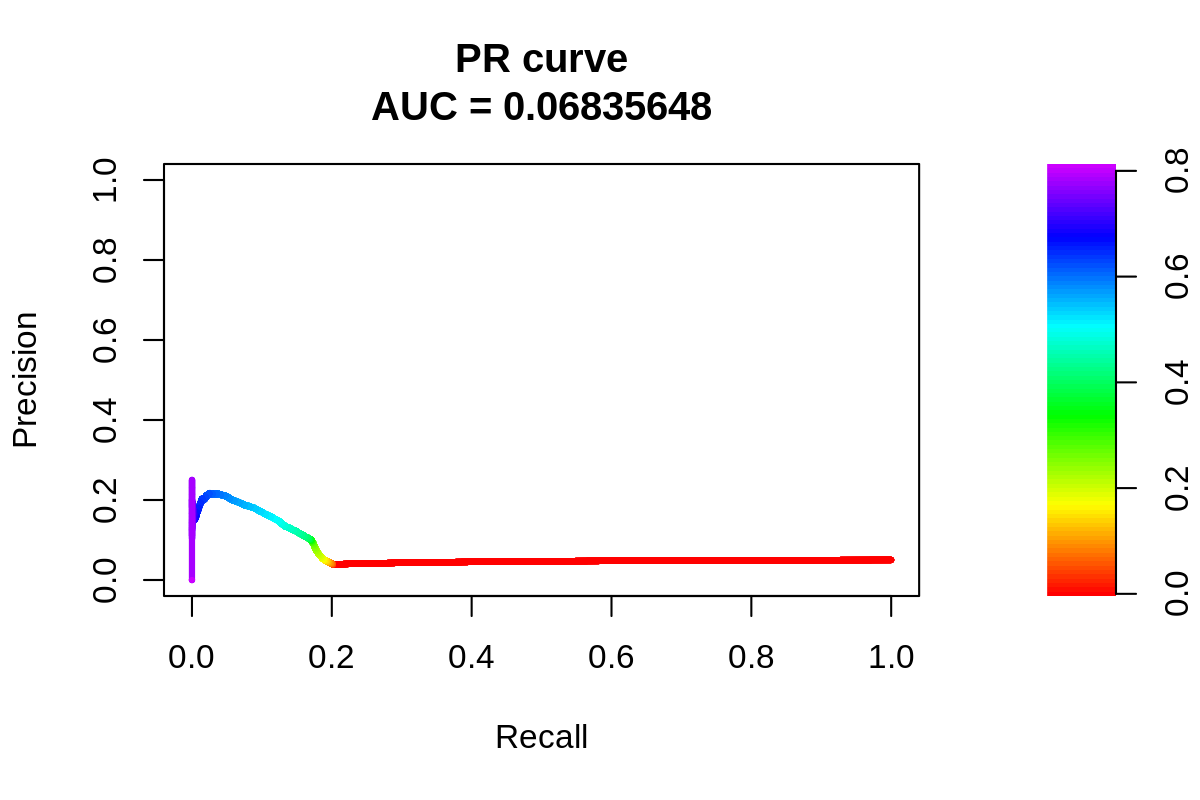

In [255]:
# pr curve
p.dims(6,4)
plot(pr)

In [256]:
fg = mMIC %>%
    filter.(Extensive_misassembly == 1,
            assembler == 'metaspades') %>%
    .$metaMIC_contig_score
bg = mMIC %>%
    filter.(Extensive_misassembly == 0,
            assembler == 'metaspades') %>%
    .$metaMIC_contig_score
pr = pr.curve(scores.class0 = fg, scores.class1 = bg, curve=TRUE)
pr


  Precision-recall curve

    Area under curve (Integral):
     0.05062623 

    Area under curve (Davis & Goadrich):
     0.05062392 

    Curve for scores from  0  to  0.79695 
    ( can be plotted with plot(x) )


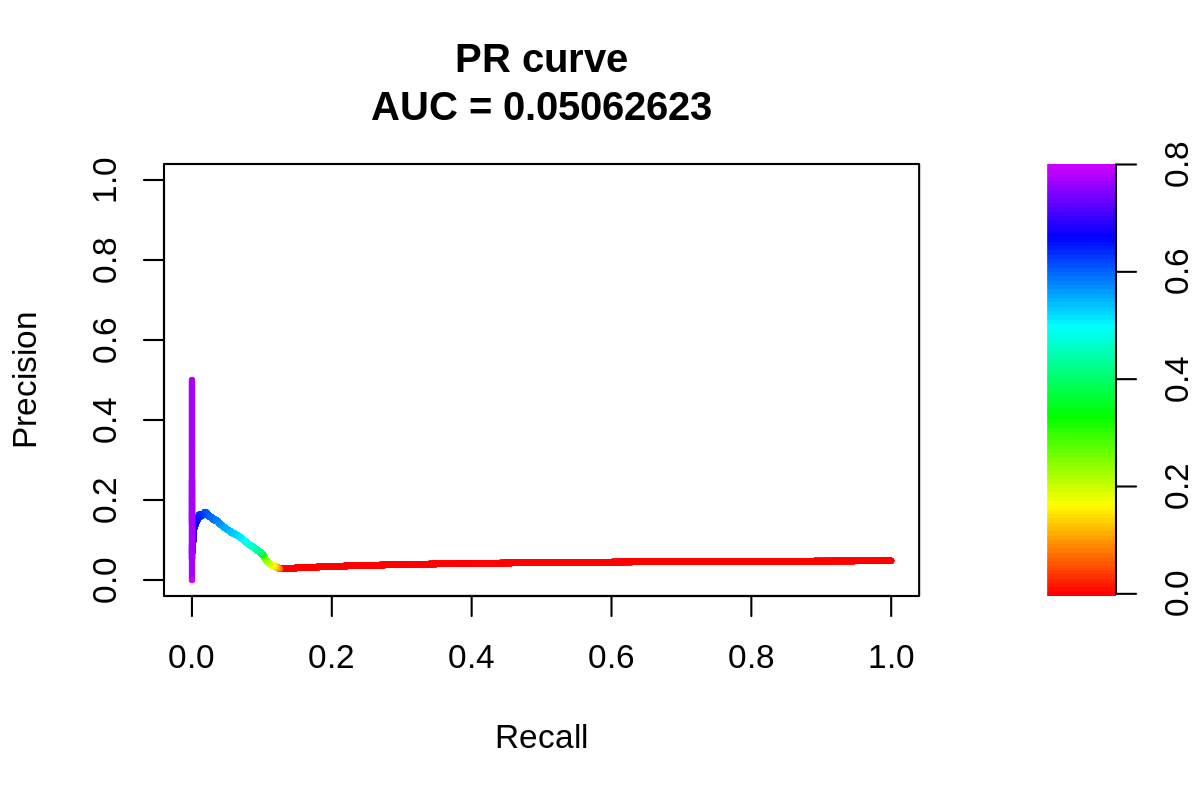

In [257]:
# pr curve
p.dims(6,4)
plot(pr)

In [258]:
# function to calc aucpr
calc_aucpr = function(df){
    if(nrow(df) == 0){
        df = data.frame(aucpr = NA,
                        assembler = df$assembler[1],
                        richness = df$richness[1],
                        abund_dist = df$abund_dist[1],
                        sim_rep = df$sim_rep[1],
                        read_length = df$read_length[1],
                        seq_depth = df$seq_depth[1])
        return(df)
    }
    fg = df %>%
        filter.(Extensive_misassembly == 1) %>%
        .$metaMIC_contig_score
    bg = df %>%
        filter.(Extensive_misassembly == 0) %>%
        .$metaMIC_contig_score
    pr = pr.curve(scores.class0 = fg, scores.class1 = bg)
    df = data.frame(aucpr = pr$auc.integral,
                    assembler = df$assembler[1],
                    richness = df$richness[1],
                    abund_dist = df$abund_dist[1],
                    sim_rep = df$sim_rep[1],
                    read_length = df$read_length[1],
                    seq_depth = df$seq_depth[1])
    return(df)
}
#calc_aucpr(mMIC)

In [259]:
# per condition
mMIC_s = mMIC %>%
    group_split.(assembler, richness, abund_dist, sim_rep, read_length, seq_depth) %>%
    lapply(calc_aucpr) %>%
    rbindlist(use.names=TRUE)
mMIC_s

aucpr,assembler,richness,abund_dist,sim_rep,read_length,seq_depth
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.08076966,megahit,0.005555,mean-10-sigma-1,1,100,2000000
0.07460592,metaspades,0.005555,mean-10-sigma-1,1,100,2000000
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.07192321,megahit,0.555555,mean-10-sigma-2,1,150,8000000
0.06379295,metaspades,0.555555,mean-10-sigma-2,1,150,8000000


In [260]:
# checking counts
mMIC_s %>%
    filter.(abund_dist == 'mean-10-sigma-1') %>%
    summarize.(n = n.(),
               .by=c(assembler, richness, read_length, seq_depth))

assembler,richness,read_length,seq_depth,n
<chr>,<chr>,<chr>,<chr>,<int>
megahit,0.005555,100,2000000,1
metaspades,0.005555,100,2000000,1
⋮,⋮,⋮,⋮,⋮
megahit,0.555555,150,8000000,1
metaspades,0.555555,150,8000000,1


In [261]:
# value distribution
summary_x(mMIC_s$aucpr)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,NA's,sd,sd_err_of_mean
aucpr,0.01738574,0.06067124,0.08042156,0.09744682,0.1218108,0.4,9,3.355,1.268


In [262]:
mMIC_s %>% filter.(aucpr > 0.35)

aucpr,assembler,richness,abund_dist,sim_rep,read_length,seq_depth
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.4,megahit,0.333333,mean-10-sigma-1,1,150,500000


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


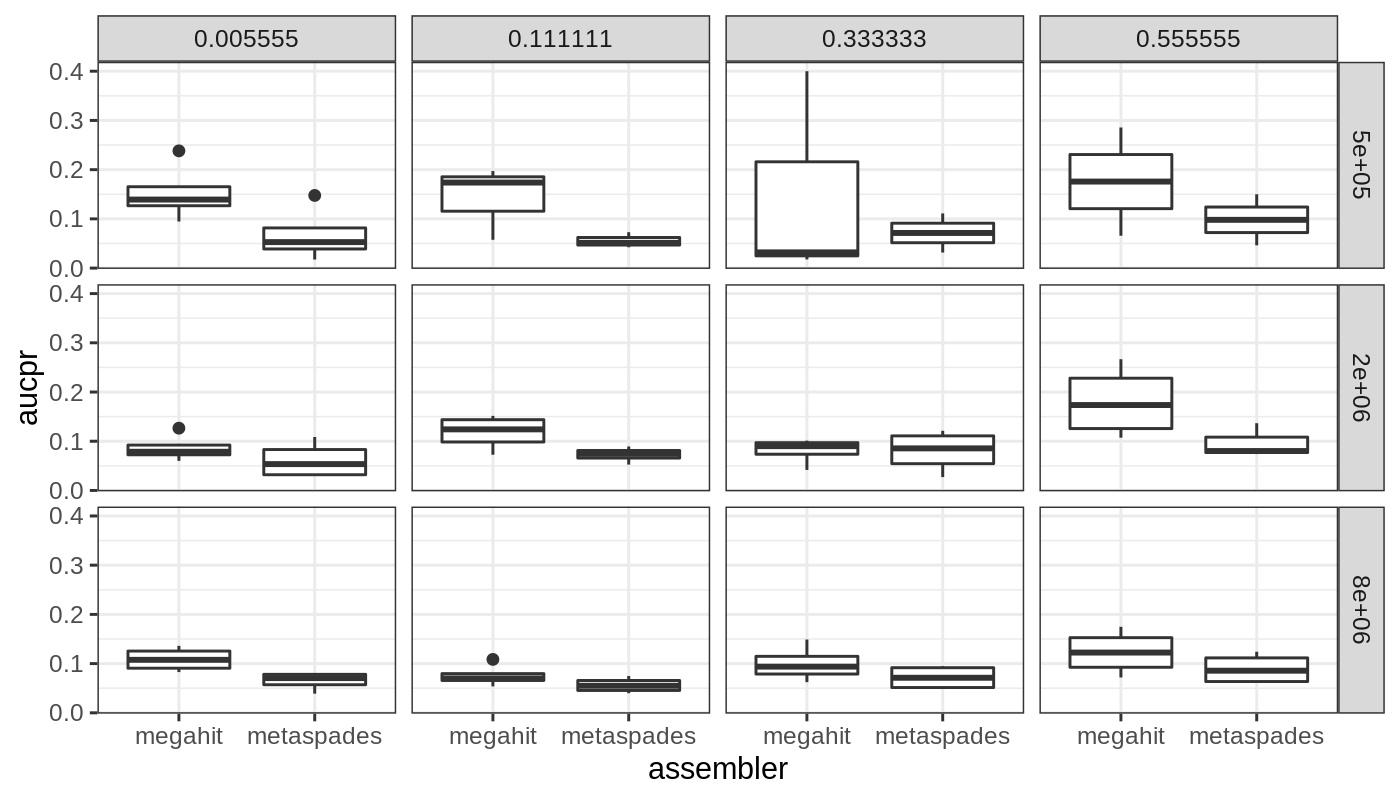

In [266]:
# plotting
p = mMIC_s %>%
    mutate.(richness = richness %>% as.Num,
            seq_depth = seq_depth %>% as.Num) %>%
    ggplot(aes(assembler, aucpr)) +
    geom_boxplot() +
    facet_grid(seq_depth ~ richness) +
    theme_bw()
p.dims(7,4)
plot(p)

# sessionInfo

In [ ]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.6.3  IRdisplay_0.7.0 pbdZMQ_0.3-3    tools_3.6.3    
 [5] htmltools_0.4.0 pillar_1.4.4    base64enc_0.1-3 crayon_1.3.4   
 [9] Rcpp_1.0.4.6    uuid_0.1-4      IRkernel_1.1    jsonlite_1.6.1 
[13] digest_0.6.25   repr_1.1.0      rlang_0.4.6     eval